# Importing Libraries

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch.nn as nn
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

from tqdm.notebook import tqdm, trange

# Importing Data

In [2]:
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)

# Exploratory Data Analysis

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


In [3]:
normal_ecg = df[df[140] == 1] # Normal Samples
normal_ecg = normal_ecg.drop(140, axis = 1)

In [6]:
normal_ecg.head()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456


In [4]:
abnormal_ecg = df[df[140] == 0] # Abnormal Samples
abnormal_ecg = abnormal_ecg.drop(140, axis = 1)

In [22]:
abnormal_ecg.head()

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
292,-0.032245,-0.545050,-0.822340,-1.605085,-1.805775,-2.008067,-2.233975,-2.191458,-2.058071,-1.880849,...,-0.906425,-1.621376,-2.329090,-3.049894,-3.620413,-4.210482,-4.043785,-3.051813,-2.806866,-0.879666
293,-0.003377,-0.279265,-0.230519,-0.635978,-0.894795,-1.023105,-1.243738,-1.458372,-1.677896,-1.784530,...,-2.155969,-2.640508,-3.218384,-3.651630,-3.881198,-3.924672,-3.164390,-2.228373,-1.837544,-0.378489
294,0.195989,-0.222258,-0.754773,-1.415614,-1.775851,-2.162326,-2.467492,-2.331384,-1.993476,-1.611709,...,-0.162438,-0.935030,-1.654340,-2.434240,-3.472170,-4.280780,-4.629438,-3.794192,-2.851468,-1.743521
295,0.894867,-0.003822,-0.751052,-1.396543,-1.737838,-2.113020,-2.213210,-2.203347,-2.024191,-1.591458,...,-0.899746,-1.441516,-1.861612,-2.321381,-2.884877,-3.530246,-4.412515,-3.903331,-3.567106,-1.536338
296,1.250060,0.760800,0.042925,-0.627974,-0.963454,-1.261335,-1.652440,-1.888433,-1.935217,-1.808429,...,-0.695282,-0.979223,-1.353969,-1.952051,-2.640386,-3.000281,-3.812490,-3.973360,-5.221946,-3.661793


In [5]:
# Splitting the Normal ECG Data for training and validation resp.
train_normal, test_normal = train_test_split(normal_ecg, test_size = 0.3, random_state = 42)

In [12]:
type(train_normal)

pandas.core.frame.DataFrame

# Data Normalization

In [6]:
scaler = StandardScaler()
train_norm = scaler.fit_transform(train_normal)
test_norm = scaler.fit_transform(test_normal)

In [15]:
type(train_norm), type(test_norm)

(numpy.ndarray, numpy.ndarray)

In [18]:
type(abnormal_ecg)

pandas.core.frame.DataFrame

# Plotting

In [27]:
test_norm[0].shape

(140,)

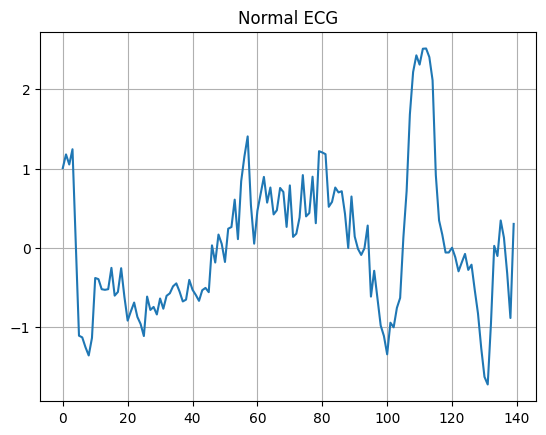

In [7]:
plt.plot(np.arange(140), test_norm[10])
plt.grid()
plt.title('Normal ECG')
plt.show()

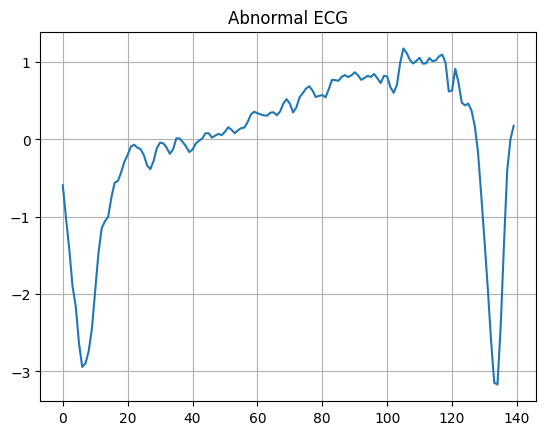

In [8]:
plt.plot(np.arange(140), abnormal_ecg.iloc[10])
plt.grid()
plt.title('Abnormal ECG')
plt.show()

# Loading Data As PyTorch Tensor

In [9]:
class CustomDataset(Dataset):
    def __init__(self, array):
        self.X = torch.from_numpy(array)
        self.X = self.X.float()
    def __len__(self) -> int:
        return len(self.X)

    def __getitem__(self, index: int):
        return self.X[index]

In [10]:
train_dataset = CustomDataset(train_norm)
train_dl = DataLoader(dataset=train_dataset, batch_size = 512, shuffle= True, drop_last= True)

In [11]:
val_dataset = CustomDataset(test_norm)
val_dl = DataLoader(dataset= val_dataset, batch_size = 512, shuffle= True, drop_last= True)

In [36]:
for batch in train_dl:
    print(batch.dtype)
    break

torch.float32


# Modelling

In [7]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.Encoder = nn.Sequential(
            nn.Linear(in_features=140, out_features=100),
            nn.ReLU(),
            nn.Linear(in_features=100, out_features=64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU()
        )
        
        self.Decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 140)
        )
    # Forward Loop
    
    def forward(self, x):
        encoded = self.Encoder(x)
        decoded = self.Decoder(encoded)
        return decoded
    
    # Forward Method
    
    @staticmethod
    def train_loop(model, inputs, optimizer, loss_function):
        # Zeroing the stored gradients
        optimizer.zero_grad()
        # Making Prediction
        preds = model(inputs)
        # Calculating Loss
        loss = loss_function(preds, inputs)
        # Measuring how much to move gradient
        loss.backward()
        # Taking the backprop step
        optimizer.step()
        # Returns the loss
        return loss.item()
    
    # Validation Loop
    
    @staticmethod
    def val_loop(model, inputs, loss_function):
        preds = model(inputs)
        loss = loss_function(preds, inputs)
        return loss.item()

# Training Essentials

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Autoencoder().to(device)
loss_fn = nn.MSELoss() #L1Loss()
optimizer = torch.optim.AdamW(model.parameters(), lr = 1e-3, weight_decay = 1e-2)
cos_sch = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max = 5, eta_min = 1e-5)
red_sch = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',factor = 0.75, patience=4)

In [56]:
total_params = 0
for param in model.parameters():
    total_params += param.numel()  # numel() returns the total number of elements in the tensor

print(f"Total number of parameters: {total_params}")

Total number of parameters: 35208


# Training Loop

In [57]:
max_epoch = 2000

In [58]:
train_loss_logger = []
val_loss_logger = []

In [59]:
pbar = trange(0, max_epoch, desc = "Epoch", leave = True)

for epoch in pbar:
    # Training Loop
    
    model.train()
    loss_epoch = 0
    for batch in tqdm(train_dl, desc = 'Training Loop', leave = False):
        inputs = batch.to(device)
        loss_epoch += Autoencoder.train_loop(model, inputs, optimizer, loss_fn) * inputs.size(0)
        
    train_loss_logger.append(loss_epoch/ len(train_dl.dataset))
    
    # Validation Loop
    
    model.eval()
    loss_epoch = 0
    with torch.no_grad():
        for batch in tqdm(val_dl, desc = 'Training Loop', leave = False):
            inputs = batch.to(device)
            loss_epoch += Autoencoder.val_loop(model, inputs, loss_fn) * inputs.size(0)
    
    val_per_sample_loss = loss_epoch/ len(val_dl.dataset)
    val_loss_logger.append(val_per_sample_loss)
    
    # Schedulers
    cos_sch.step()
    red_sch.step(val_per_sample_loss)
    
    # Progress Bar Update
    pbar.set_postfix({'Validation Loss': val_loss_logger[-1], 'Train Loss' : train_loss_logger[-1]})

Epoch:   0%|          | 0/2000 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/3 [00:00<?, ?it/s]

Training Loop:   0%|          | 0/1 [00:00<?, ?it/s]

# Visulization of Loss

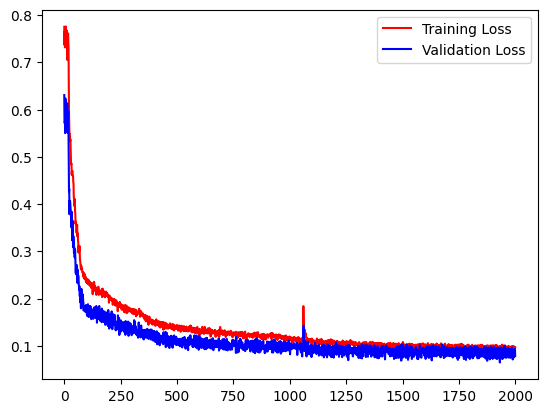

Last Train Loss 0.0971770321570129
Last Validation Loss 0.07870347532507492


In [60]:
plt.plot(train_loss_logger, c = 'r')
plt.plot(val_loss_logger, c = 'b')
plt.legend(labels = ['Training Loss', 'Validation Loss'])
plt.show()
print(f'Last Train Loss {train_loss_logger[-1]}')
print(f'Last Validation Loss {val_loss_logger[-1]}')

# Saving Model

In [61]:
torch.save(model.state_dict(), '/kaggle/working/model.pth')

# Loading Model

In [9]:
!conda install --yes gdown

Retrieving notices: ...working... done
Channels:
 - rapidsai
 - nvidia
 - nodefaults
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    filelock-3.15.4            |     pyhd8ed1ab_0          17 KB  conda-forge
    gdown-5.2.0                |     pyhd8ed1ab_0          21 KB  conda-forge
    openssl-3.3.1              |       hb9d3cd8_3         2.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following NEW packages will be INSTALLED:

  filelock           conda-forge/noarch::filelock-3.15.4-pyhd8ed1ab_0 
  gdown              conda-forge/noarch::gdown-5.2.0-pyhd8ed1ab_0 

The following packages will be UPDATED:

  openssl  

In [10]:
!gdown 1CAIdennF0g8SXozod-PBY-1O8AhSAxGb

Downloading...
From: https://drive.google.com/uc?id=1CAIdennF0g8SXozod-PBY-1O8AhSAxGb
To: /kaggle/working/AnomalyDetectionModel.pth
100%|████████████████████████████████████████| 146k/146k [00:00<00:00, 72.9MB/s]


In [11]:
path_to_model = '/kaggle/working/AnomalyDetectionModel.pth'

In [13]:
model = Autoencoder().to(device)
model.load_state_dict(torch.load(path_to_model, map_location= 'cpu', weights_only=True))

<All keys matched successfully>

In [14]:
model.eval()

Autoencoder(
  (Encoder): Sequential(
    (0): Linear(in_features=140, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): ReLU()
    (8): Linear(in_features=16, out_features=8, bias=True)
    (9): ReLU()
  )
  (Decoder): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=140, bias=True)
  )
)

# Threshold Determination

In [33]:
# Function to compute reconstruction error
def compute_reconstruction_error(model, input_data):
    # Convert input data to PyTorch tensor
    if isinstance(input_data, np.ndarray):
        tensor_data = torch.from_numpy(input_data).float().to(device)
    elif isinstance(input_data, pd.DataFrame):
        tensor_data = torch.tensor(input_data.values).float().to(device)
    else:
        tensor_data = input_data.to(device)

    # Compute reconstruction error
    model.eval()
    with torch.no_grad():
        reconstructed_data = model(tensor_data)
        mse = F.mse_loss(reconstructed_data, tensor_data, reduction='none')
        mse = mse.mean(dim=1)
    return mse.cpu().detach().numpy()

In [34]:
# Calculating reconstruction error for normal and abnormal data
reconstruction_error_normal = compute_reconstruction_error(model, test_norm)
reconstruction_error_abnormal = compute_reconstruction_error(model, abnormal_ecg)

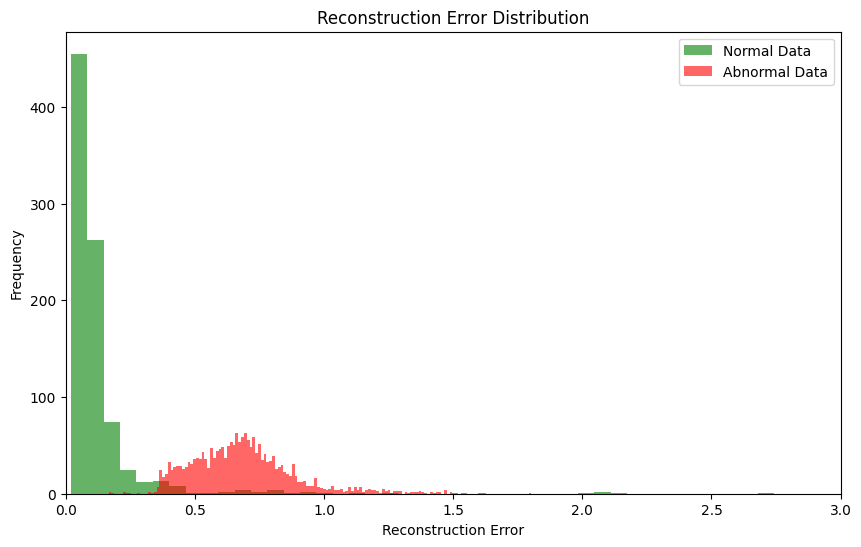

In [35]:
# Plot the distribution of reconstruction errors for normal and abnormal data
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error_normal, bins=150, alpha=0.6, color='g', label='Normal Data')
plt.hist(reconstruction_error_abnormal, bins=150, alpha=0.6, color='r', label='Abnormal Data')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution')
plt.xlim(0,3)
plt.legend()
plt.show()

In [49]:
# Determining threshold based on the 95th percentile of the reconstruction error of normal data
threshold = np.percentile(reconstruction_error_normal, 94)
print(f"Threshold for anomaly detection (95th percentile): {threshold}")

# Classifying samples as normal or anomalous based on the threshold
normal_classified = reconstruction_error_normal < threshold
abnormal_classified = reconstruction_error_abnormal > threshold

# Calculating True Positive Rate, False Positive Rate, etc.
tp = np.sum(abnormal_classified)
fp = np.sum(~normal_classified)
tn = np.sum(normal_classified)
fn = np.sum(~abnormal_classified)

# Printing performance metrics
print(f"Correctly Identified Anomalies: {tp}\nNormal Samples Identified as Anomalies: {fp}\nCorrectly Identified Normal Samples: {tn}\nAnomalies Identified as Normal Samples: {fn}")

Threshold for anomaly detection (95th percentile): 0.2956858426332474
Correctly Identified Anomalies: 2071
Normal Samples Identified as Anomalies: 53
Correctly Identified Normal Samples: 823
Anomalies Identified as Normal Samples: 8


# Visualizating Reconstruction

In [64]:
def is_anomaly(tensor,pred, loss_fn, threshold):
    """ 
    tensor : Original ECG dtype: tensor
    pred : Model's Prediction dtype: tensor
    threshold : thresholding value for Anoamly Detection
    loss_fn : Loss Function
    """
    loss = loss_fn(tensor, pred)
    loss = loss.item()
    if loss >= threshold:
        return 'Anomaly'
    else:
        return 'Normal Sample'

def plot_ecg(data, pred_np, threshold, pred, tensor,loss_fn):
    """ 
    data : Original ECG dtype: Series/Numpy Array dtype
    pred_np : Model's Prediction dtype : ndarray
    threshold : thresholding value dtype: float/double
    pred : Model's Prediction dtype: tensor
    tensor : Original ECG dtype: tensor
    loss_fn : Loss Function
    """
    label = is_anomaly(tensor,pred, loss_fn, threshold)
    plt.plot(data, c = 'black')
    plt.plot(pred_np, c = 'r')
    plt.fill_between(np.arange(140), data, pred, color = 'y')
    plt.legend(labels = ['Input', 'Reconstruction', 'Error'])
    plt.title(label)
    plt.show()

def process_plot_ecg(data, threshold, loss_fn):
    """
    data : Original ECG dtype: Series/Numpy Array dtype
    threshold : thresholding value for Anoamly Detection
    loss_fn : Loss Function
    """
    if isinstance(data, np.ndarray):
        tensor = torch.from_numpy(data).float()
        tensor = tensor.to(device)
        with torch.no_grad():
            pred = model(tensor)
            pred_np = pred.cpu().detach().numpy()
            plot_ecg(data, pred_np, threshold, pred, tensor, loss_fn)
            
    elif isinstance(data, pd.Series):
        tensor = torch.tensor(data.values).float()
        tensor = tensor.to(device)
        with torch.no_grad():
            pred = model(tensor)
            pred_np = pred.cpu().detach().numpy()
            plot_ecg(data, pred_np, threshold, pred, tensor, loss_fn)
    else:
        return -1

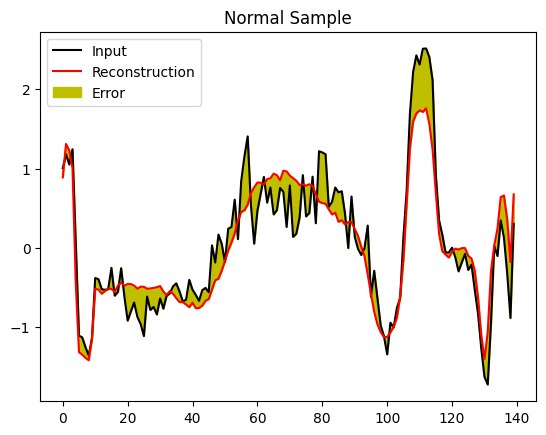

In [65]:
process_plot_ecg(test_norm[10], threshold, loss_fn)

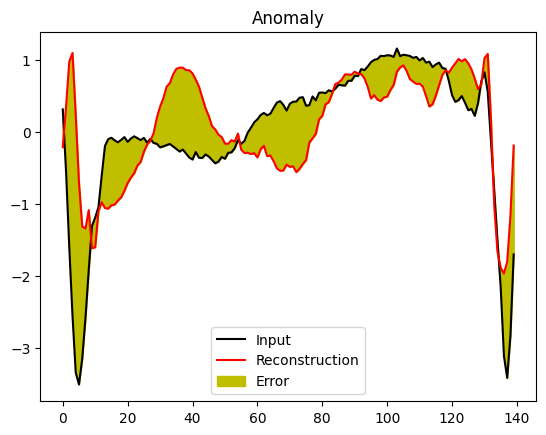

In [67]:
process_plot_ecg(abnormal_ecg.iloc[100],threshold, loss_fn)

:) End